## <center> Non-linear least square programming </center>

In general, a least square problem can be viewed as an optimization problem with the objective function $$ g(\beta) = \sum^m _{i=0} r_i(\beta)^2 = ||r(\beta)||^2$$


where $r(\beta)$ is a vector with the residuals $r_i(\beta) = y_i−f(x_i,\beta)$ for a set of m observations $(x_i,y_i)$. Here $\beta$ is a vector with unknown parameters that specifies the function f(x,$\beta$). If this problem is nonlinear in the parameters $\beta$, it is known as a nonlinear least square problem, and since it is nonlinear, it cannot be solved with the linear algebra techniques. We can use the multivariate optimization techniques described in the previous section, such as Newton’s method or a quasi-Newton method. However, this nonlinear least square optimization problem has a specific structure, and several methods that are tailored to solve this particular optimization problem have been developed. One example is the Levenberg-Marquardt method, which is based on the idea of successive linearizations of the problem in each iteration.

In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta) # Unknown
ydata = y + 0.05 * np.random.randn(len(xdata))


In [3]:
def g(beta):
    return ydata - f(xdata, *beta)


beta_start = (1, 1, 1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)

beta_opt, beta_cov

(array([0.25061187, 0.74839702, 0.52654034]), 1)

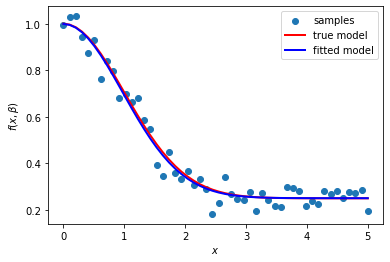

In [6]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$")
ax.legend()

The SciPy optimize module also provides an alternative interface to nonlinear least square fitting, through the function optimize.curve_fit. This is a convenience wrapper around optimize.leastsq, which eliminates the need to explicitly define the residual function for the least square problem.

In [7]:
beta_opt, beta_cov = opt.curve_fit(f, xdata, ydata)
beta_opt, beta_cov

(array([0.25061187, 0.74839702, 0.52654034]),
 array([[ 8.23749264e-05, -6.02125449e-05,  1.62079884e-04],
        [-6.02125449e-05,  3.67894307e-04,  1.85354782e-04],
        [ 1.62079884e-04,  1.85354782e-04,  1.22447140e-03]]))